# Lab 1:  Introduction to Jupyter and Symbolic Math

## 1. Background

This course includes a set of computer laboratories that explore topics related to signals and systems.  These will be made available to you as the course progresses, and you are expected to engage with the content and produce and submit a set of results related to some defined tasks. Assistance will be provided if required, but it is really expected that you'll work in your own time and at your own pace: it's important right from the start for you to take responsibility for your own learning. You shouldn't be working in groups, but helping one another out on specific issues is fine.

The computer labs are based on the Python programming language, and they require a kernel that includes all the standard numerical libraries. The labs have been created as worksheets using the *Jupyter Notebook* system, which works in a browser and allows you to interleave text and Python code snippets that can be run interactively. Jupyter can be installed via a package called *Anaconda* - see the Orientation "Labs" lesson on Vula for details.

This first lab covers the introduction to Jupyter as well as specific scientific libraries such as NumPy, SymPy and Matplotlib. These packages are instrumental for data visualisation using Python, and will be used throughout the three labs for this course.

### Basic Jupyter usage

A notebook is basically composed of cells.  A cell can contain text ("markdown") or code - in this case, Python.  For any cell you can select the content type using the pulldown on the menubar.  A cell can be executed by pressing shift-enter while it is in focus.

Below is a cell that creates two "numpy" arrays. The values in `x` (i.e. function `x(t)`) are initialised to be a particular function of `t` (i.e. your time variable).  Select it and press shift-enter to run the code in the Python kernel attached to the notebook.  Change the number of points in `t` and press shift-enter again to run, and note the change in output values.

In [15]:
import numpy as np # Import numpy for vector computations

t = np.linspace(0, 10, 15); # Create a time variable from t = 0 to t = 10 with 10 points in this range
x = 0.1*t**2 - np.cos(t); # Create x variable as a function of t
print(x); # Print values of x at the 10 defined points of t

[-1.         -0.70454094  0.06233574  1.00054958  1.77614273  2.18454434
  2.25058061  2.21633781  2.42281184  3.14320302  4.44935469  6.17663061
  8.00440189  9.6127952  10.83907153]


The Python kernel is fully-featured for numeric computation, and includes most of the packages useful for scientific computing.  The following code plots the vectors defined above using "matplotlib".  The `%matplotlib notebook` line makes any plots appear in the notebook itself rather than in a separate window.

<IPython.core.display.Javascript object>


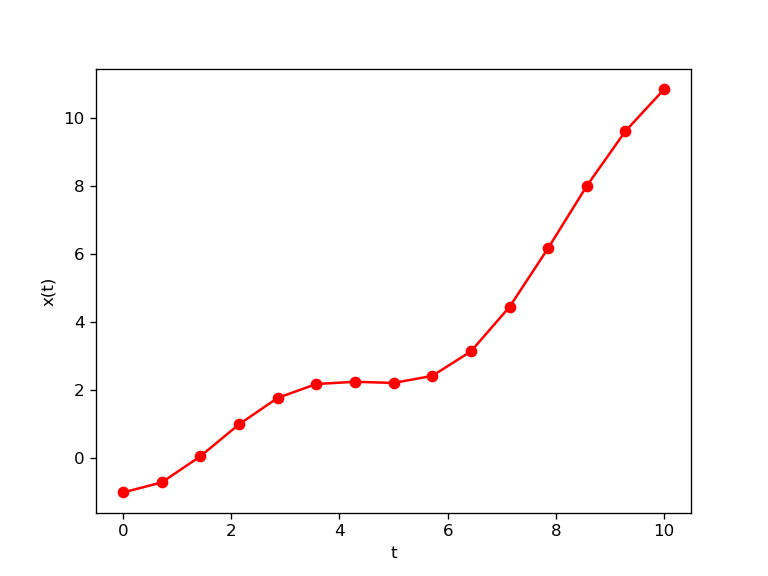

In [21]:
import matplotlib.pyplot as plt # Import matplotlib for plotting
%matplotlib notebook

plt.rcParams['figure.dpi'] = 60; # Decrease plot size
plt.plot(t, x, 'ro-') # Plot x vs t using red, circular dots connected by lines
plt.xlabel('t');  plt.ylabel('x(t)'); # Labels for axes

When you execute the code above it runs it in the Python kernel for the notebook, which already has the variables `t` and `x` defined.  This can cause problems:  if you jump around the notebook running cells in some arbitrary order then the kernel will probably end up in a weird state.  If this happens then you can use the menu item "Cell" -> "Run All" to re-execute all cells in the notebook in order.  If things really go wrong then restart the kernel.

Executing a text or markdown cell has a different effect:  the content is converted and rendered as rich text.  The markdown language is documented all over the internet, and supports both HTML and LaTeX equations.  Do a web search if you want details or introductions to these topics.

### Gaining familiarity

One of the nice things about Python is that there's an active community of technical people that provide useful information and resources.  If you don't know how to do something, then a simple web search can quickly help. There are also some "Cheat Sheets" available on Vula if you're feeling rusty with your Python.

There's a basic numerical Python tutorial at `http://cs231n.github.io/python-numpy-tutorial`, and a Python notebook version at `https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb`. A copy of this notebook that has been updated for Python 3 is included in the "examples" directory of your "notebooks" folder. Load this notebook and work through the cells.  Make changes to the contents, and press "shift-enter" to run and see the corresponding outputs. Pay particular attention to how to use numpy arrays, and how to plot using matplotlib.

You can also access function help in Jupyter notebook. You can access help windows for functions by placing a `?` before a function, e.g. `#?plt.plot()`.

## 2. Symbolic math introduction

Now that we've covered the basics, we can move onto something more useful: symbolic mathematics. This is a maturing technology that lets a computer do maths using symbolic manipulation rather than numerical computation. Python has support for symbolic computation via the "sympy" package. Some good examples of sympy in use are at `http://www.cfm.brown.edu/people/dobrush/am33/SymPy/index.html` and `https://github.com/sympy/sympy/wiki/Quick-examples`.

### Basic differentiation

The cell below imports the symbolic math package, and defines two symbolic variables `x` and `y`.  A symbolic function $f(x,y) = (x^2-2x+3)/y$ is then defined and printed.

In [41]:
import sympy as sp # Import the sympy library under the name 'sp'

x, y = sp.symbols('x y');
f = (x**2 - 2*x + 3)/y;
print(f);

(x**2 - 2*x + 3)/y


In [4]:
# Pro-tip: you can make your outputs look good with LaTeX:
from IPython.display import display 
sp.init_printing() # Initialises pretty printing. Only needs to be run once!

# Behold:
print(f) # Ugly mode
display(f) # Fancy-pants mode

(x**2 - 2*x + 3)/y


Note that `f` here is a symbol representing a function.  It would be nice if the notation made it explicit that it's actually a function of $x$ and $y$, namely `f(x,y)`, but that's not how it works.  However, we can query the free variables:

In [5]:
f.free_symbols

We can get sympy to find a symbolic expression for the partial derivative of $f(x,y)$ with respect to $y$ by using: 

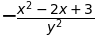

In [6]:
fpy = sp.diff(f, y)
fpy

To evaluate this derivative at some particular values $x=\pi$ and $y=2$ we can substitute into the symbolic expression:

In [7]:
fpyv = fpy.subs([(x, sp.pi), (y, 2)])
fpyv

Notice though that this is still a symbolic expression.  It can be evaluated using the "evalf" method, which finally returns a number:

In [8]:
fpyv.evalf()

### More advanced differentiation

Symbolic expressions can be manipulated. For example, we can define $g(t) = f(x(t), y(t))$, which in this case (given above) means:
$$g(t) = (x(t)^2-2x(t)+3)/y(t),$$
and we can find its derivative with respect to time. I.e. $g$ is a function of time determined by $x$ and $y$, which are also functions of time.

In [9]:
t = sp.symbols('t');
xt = sp.Function("x")(t);  # x(t)
yt = sp.Function("y")(t)  # y(t)

g = f.subs([(x,xt),(y,yt)]); # Define g(t)
gp = sp.diff(g,t); # Differentiate g(t) with respect to time
g # Print g(t)

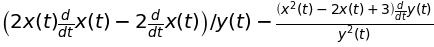

In [10]:
gp # Print g'(t)

### Plotting symbolic functions

The sympy module also has a `plot` method that knows how to plot symbolic functions of a single variable.  The function `g` above with $x(t) = \sin(t)$ and $y(t) = \cos(2t)$ is a function of a single time variable `t`, and can be visualised as follows:

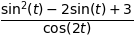

In [11]:
gs = g.subs([(xt,sp.sin(t)), (yt,sp.cos(2*t))]); # Create function gs(t)
gs

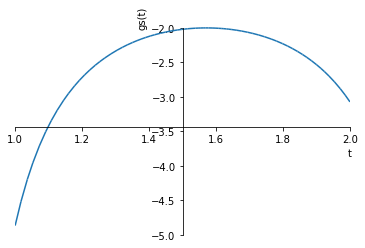

In [12]:
sp.plot(gs, (t,1,2), xlabel="t", ylabel="gs(t)"); # Plot gs vs t using sympy (t defined from t = 1 to t = 2)

A roughly equivalent plot could be obtained numerically by creating a lambda function for the expression, evaluating it for a closely-spaced set of values of `t` over the required range, and using standard numerical plotting functions that draw straight lines between the calulated points.  If you increase the number of calculated points over the interval then the  approximation in the above graph becomes more accurate. You can think of a lambda function as just another way of defining a function, e.g. `f = x^2` is the same as `def my_func(x): x^2`.

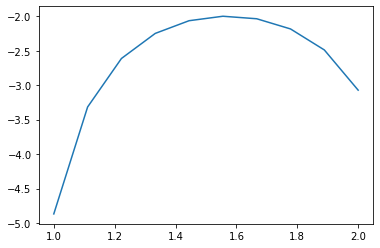

In [13]:
tv = np.linspace(1, 2, 10); # Axis between tv = 1 and tv = 2 for 10 steps
gs_h = sp.lambdify(t, gs, modules=['numpy']);
gstv = gs_h(tv);
plt.figure(); # New figure
plt.plot(tv, gstv);

### Symbolic integration

Integration is also a standard function in sympy, so we can find for example the integral
$$y(t) = \int_{-10}^t x(\lambda) d\lambda$$
for $x(t) = e^{-t/10} \cos(t)$:

In [14]:
xt = sp.exp(-t/10)*sp.cos(t);  # x(t)
lamb = sp.symbols('lamb');   # Dummy variable Lambda
xl = xt.subs(t,lamb);  # x(lamb)
yt = sp.integrate(xl, (lamb, -10, t));  # Indefinite integral that produces a function of t
yt # Display y(t)

NOTE: To get a definite integral over the range, say -10 to 0, you'd go `yt = sp.integrate(xl, (lamb, -10, 0))`. Also, don't forget about your initial conditions; the definite integral only gives the change in the variable over the
interval, so you need to add its initial state to this value get the true final state. We'll usually assume initial rest conditions in this course, but NOT always.

Overall, the sympy plot function is quite fragile, and might not always work. Symbolic math packages are amazing, but they're difficult to implement and are sometimes not robust: you'll find various postings on the internet that give instances of very good symbolic math engines giving a wrong result. In short, they are useful but you should be careful when using them.

## Tasks

These tasks involve writing code, or modifying existing code, to meet the objectives described.

1.  We often need to plot complex-valued signals, where for each value of $t$ there is a real and an imaginary value, or a magnitude and a phase.  We therefore need two sets of axes.  Use the `subplot` functionality of `matplotlib.pyplot` to plot the real and imaginary parts of the signal $x(t) = e^{j \omega_0 t}$ in a single figure, but on two separate axes.  Use a value of $\omega_0 = 4$ and make the plot range over $t=0$ to $t=10$. (5 marks)<br><br>

2.  Signal processing often involves recursion. This course concentrates on continuous-time signals, but equivalent processes can be applied in the digital (discrete) case. Consider the recursive equation $x[n] = -0.90 x[n-1]$.  Create a numpy array with 100 elements for each of the values $x[0]$ to $x[99]$, and write code to populate it (assuming the initial condition $x[0] = 10$).  Use `stem` to make a plot of $x[n]$ versus $n$ (discrete time) over the range calculated. (5 marks)<br><br>

3.  Define the expression $y(t) = v_0 t - \frac{1}{2} g t^2$ for some symbolic values of $v_0$ and $g$ using sympy.  You should recognise this as the "altitude" of a particle moving under the influence of gravity, given that the initial velocity at time $t=0$ is $v_0$.  Make a plot of the particle height in meters for $v_0 = 20 m/s$ given $g = 9.8 m/s^2$, over the range $t=0$ to $t=10$ s. (5 marks)<br><br>

4.  Suppose the acceleration of a particle is given by $a(t) = 0.3 + \cos(t)$ for positive time.  Use symbolic methods to find and plot the velocity $v(t)$ of the particle over the range $t=0$ to $t=5$ given the initial condition $v(0) = -0.2$.  Then find and plot the position $s(t)$ of the particle over the same time period, given the additional auxiliary condition $s(0) = 0.1$. (5 marks)